In [15]:
%load_ext autoreload
%autoreload 2

import os
import glob
import contextily as ctx
import geopandas as gpd

from asp_plot import icesat2
from asp_plot.icesat2 import ICESat2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]

geojson_fn = "/Users/ben/Dropbox/UW_Shean/WV/2022/utqiagvik_wv_2022_sliderule_poly.geojson"

# atl06_fn = "/Users/ben/Dropbox/UW_Shean/ICESat/icesat2_atl06_sr_10mRes_utqiagvik_WorldCover_water_crop_MayJune_allTime.parquet"
# atl06 = gpd.read_parquet(atl06_fn)


icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [17]:
icesat2 = ICESat2(dem_fn=dem_fn, geojson_fn=geojson_fn)#, atl06=atl06)

In [18]:
if icesat2.atl06 is None:
    icesat2.pull_atl06_data()

icesat2.atl06.head()


ICESat-2 ATL06 request processing



,n_fit_photons,pflags,w_surface_window_final,y_atc,region,spot,rms_misfit,dh_fit_dx,cycle,rgt,x_atc,h_sigma,segment_id,gt,h_mean,geometry,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags
time,,,,,,,,,,,,,,,,,,,,
2018-10-19 01:22:42.849838080,5,0,3.0,2075.261719,3,6,0.057618,0.004047,1,312,7947945.5,0.033456,396539,10,0.712761,POINT (-156.33771 71.24194),287762808832,1.309046e+12,90.0,0
2018-10-19 01:22:42.852651008,10,0,3.0,2075.311279,3,6,0.059513,0.009106,1,312,7947965.5,0.019844,396540,10,0.823991,POINT (-156.33778 71.24212),287762808832,1.309046e+12,90.0,0
2018-10-19 01:22:42.855464704,15,0,3.0,2075.361572,3,6,0.093339,-0.000860,1,312,7947985.5,0.024544,396541,10,0.905593,POINT (-156.33786 71.2423),287762808832,1.309046e+12,90.0,0
2018-10-19 01:22:42.858280448,18,0,3.0,2075.408936,3,6,0.091363,0.002180,1,312,7948005.5,0.021550,396542,10,0.905599,POINT (-156.33793 71.24247),287762808832,1.309046e+12,90.0,0
2018-10-19 01:22:42.861097984,19,0,3.0,2075.448486,3,6,0.104050,0.001642,1,312,7948025.5,0.024073,396543,10,0.946535,POINT (-156.338 71.24265),287762808832,1.309046e+12,90.0,0


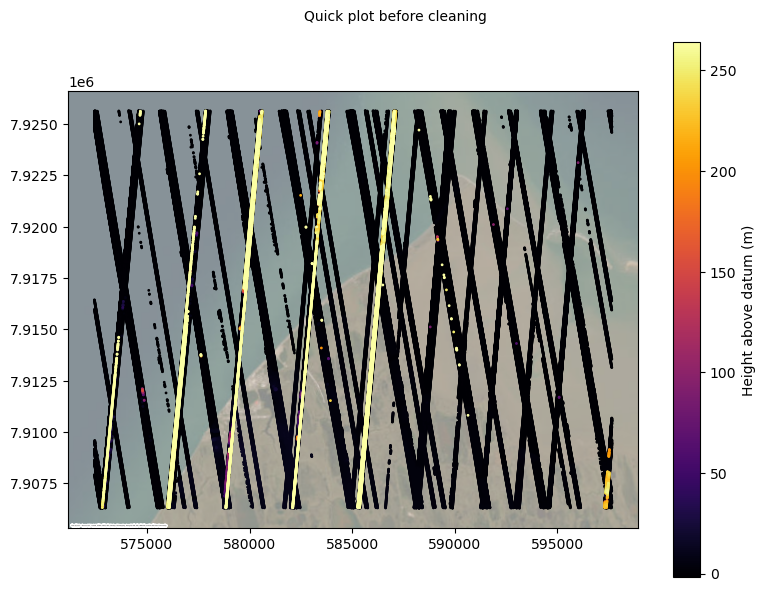

In [19]:
icesat2.title = "Quick plot before cleaning"

icesat2.plot_atl06(
    map_crs=map_crs,
    **ctx_kwargs
)

In [29]:
icesat2.clean_atl06(h_sigma_quantile=0.95)

,n_fit_photons,pflags,w_surface_window_final,y_atc,region,spot,rms_misfit,dh_fit_dx,cycle,rgt,x_atc,h_sigma,segment_id,gt,h_mean,geometry,esa-worldcover-.file_id,esa-worldcover-.time,esa-worldcover-.value,esa-worldcover-.flags
time,,,,,,,,,,,,,,,,,,,,
2019-04-18 16:42:25.758598912,355,0,3.0,4860.470703,3,3,0.125748,0.001113,3,312,7951087.5,0.006712,396696,30,-1.074176,POINT (-156.4261 71.2666),502511173632,1.309046e+12,80.0,0
2019-04-18 16:42:25.761400576,357,0,3.0,4860.419922,3,3,0.116087,-0.000561,3,312,7951107.5,0.006151,396697,30,-1.073597,POINT (-156.42618 71.26678),502511173632,1.309046e+12,80.0,0
2019-04-18 16:42:25.764204544,374,0,3.0,4860.357910,3,3,0.126234,0.011126,3,312,7951127.5,0.006533,396698,30,-0.959810,POINT (-156.42625 71.26696),502511173632,1.309046e+12,80.0,0
2019-04-18 16:42:25.767010048,390,0,3.0,4860.284668,3,3,0.231374,0.041096,3,312,7951147.5,0.011716,396699,30,-0.436510,POINT (-156.42632 71.26713),502511173632,1.309046e+12,80.0,0
2019-04-18 16:42:25.769822720,332,0,3.0,4860.202637,3,3,0.236039,0.065633,3,312,7951167.5,0.013029,396700,30,0.631266,POINT (-156.42639 71.26731),502511173632,1.309046e+12,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12 14:33:11.017872128,6,0,3.0,3225.771484,5,5,0.062522,0.003314,23,381,12120295.0,0.025552,605076,20,3.923541,POINT (-156.61347 71.26696),833223655424,1.309046e+12,90.0,0
2024-04-12 14:33:11.020683520,15,0,3.0,3225.805908,5,5,0.109368,0.012694,23,381,12120315.0,0.037691,605077,20,4.019473,POINT (-156.61354 71.26678),833223655424,1.309046e+12,90.0,0
2024-04-12 14:33:11.023492352,21,0,3.0,3225.857666,5,5,0.229142,0.001141,23,381,12120335.0,0.051944,605078,20,4.120587,POINT (-156.61361 71.2666),833223655424,1.309046e+12,90.0,0


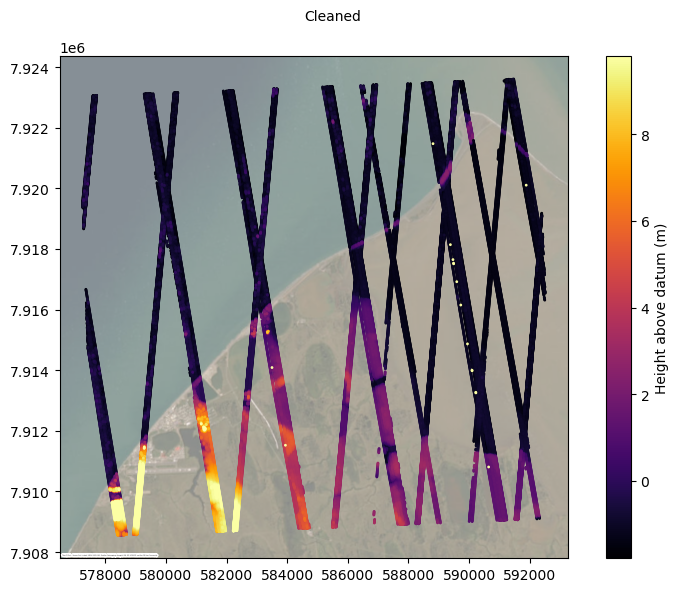

In [30]:
icesat2.title = "Cleaned"

icesat2.plot_atl06(
    clean=True,
    map_crs=map_crs,
    **ctx_kwargs
)